In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Read data
dataset = pd.read_csv("../data/pricevssold2.csv")
dataset

,Quantity Sold,Price,Advertising
0,8500,2,2800
1,4700,5,200
2,5800,3,400
3,7400,2,500
4,6200,5,3200
5,7300,3,1800
6,5600,4,900


In [3]:
X1 = dataset["Price"].values
X2 = dataset["Advertising"].values
Y = dataset["Quantity Sold"].values

In [4]:
n = len(X1)

mean_y = np.mean(Y)
mean_x1 = np.mean(X1)
mean_x2 = np.mean(X2)

cov_x1_y = np.sum((X1 - mean_x1) * (Y - mean_y)) / (n - 1)
cov_x2_y = np.sum((X2 - mean_x2) * (Y - mean_y)) / (n - 1)

var_x1 = np.sum((X1 - mean_x1)**2) / (n - 1)
var_x2 = np.sum((X2 - mean_x2)**2) / (n - 1)

beta1 = cov_x1_y / var_x1
beta2 = cov_x2_y / var_x2
beta0 = mean_y - beta1 * mean_x1 - beta2 * mean_x2

In [5]:
print(f"Formula: y = ({beta0}) + ({beta1}) * X1 + ({beta2}) * X2")

Formula: y = (8520.820608152968) + (-823.5294117647061) * X1 + (0.5733634311512414) * X2


In [6]:
f_pred = lambda price, advertising: beta0 + price * beta1 + advertising * beta2
y_pred = f_pred(X1, X2)

SSE = np.sum((Y - y_pred)**2)
TSS = np.sum((Y - mean_y)**2)
rsqr = 1 - SSE/TSS

In [7]:
print(f"R^2: {rsqr}")
print(f"Prediction residuals:\n{Y - y_pred}")

R^2: 0.9612891055594547
Prediction residuals:
[  20.82060815  182.15376444 -479.57774532  239.5564998   -37.93652901
  217.71345107 -142.73004913]


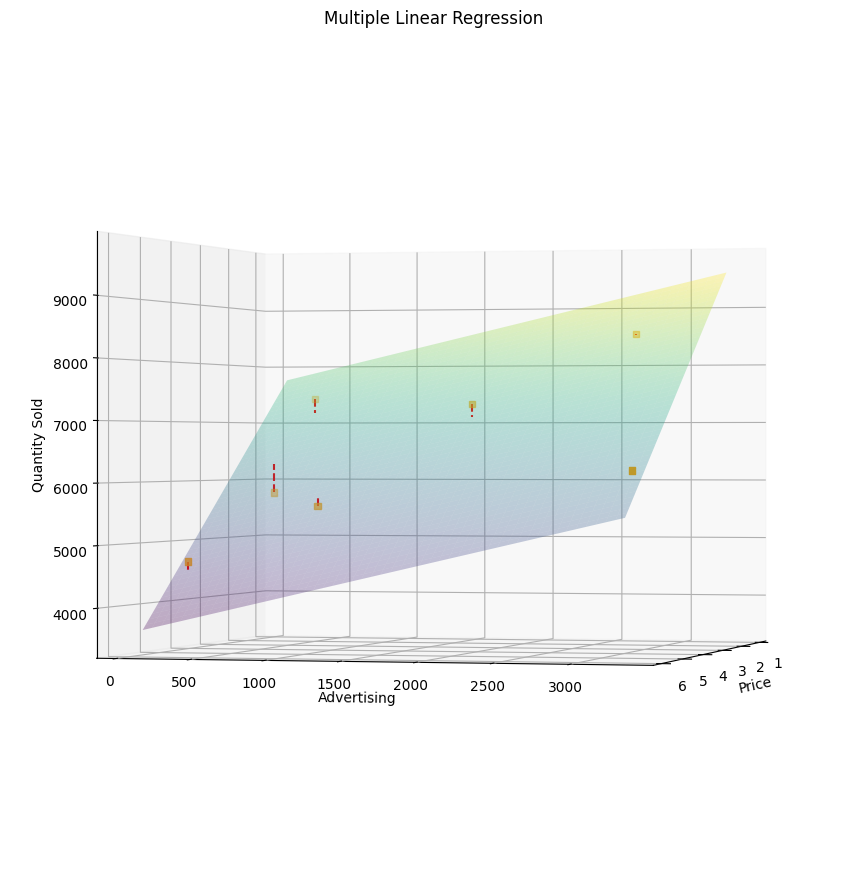

In [8]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection="3d")


XS1 = np.linspace(1, 6, 1000)
XS2 = np.linspace(100, 3300, 1000)
XS1, XS2 = np.meshgrid(XS1, XS2)
YS = f_pred(XS1, XS2)

ax.plot_surface(XS1, XS2, YS, cmap="viridis", alpha=0.3)
ax.scatter(X1, X2, Y, color="orange", marker="s")
for i in range(n):
    ax.plot([X1[i], X1[i]], [X2[i], X2[i]], [Y[i], f_pred(X1[i], X2[i])], color="red", linestyle="--")

ax.view_init(elev=0, azim=15)

ax.set_xlabel("Price")
ax.set_ylabel("Advertising")
ax.set_zlabel("Quantity Sold")
ax.set_title("Multiple Linear Regression")
plt.tight_layout()